# Data Science Sandbox example with `scikit-learn`
[ralph.schlosser@gmail.com](ralph.schlosser@gmail.com)

## Introduction

Here is a short test with `scikit-learn` in Python.

We are applying various ML algorithms to the digits data set.

(array([7]), array([3]))
3    92
5    91
2    91
1    91
7    90
6    90
0    90
4    89
9    88
8    86
dtype: int64
Linear SVC - score: 0.884444444444
kNN - score: 0.953333333333
Random Forest Classifier - score: 0.88
kNN
0 0.968819599109
Random Forest
4 0.946547884187
SVM
0 0.953229398664
0.968819599109 0.946547884187 0.942093541203


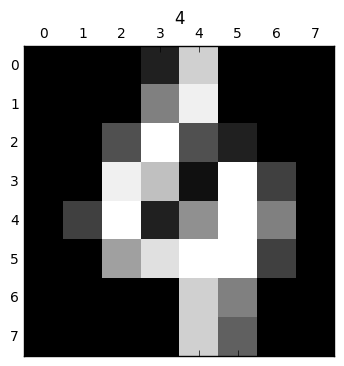

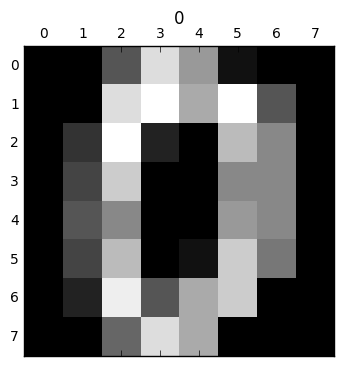

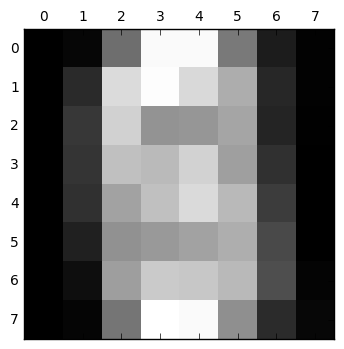

In [8]:
# First some imports.
from sklearn import datasets
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load digits data set.
digits = datasets.load_digits()


# Some exploratory plots.
choose_row = 100
plt.gray() 
plt.matshow(digits.images[choose_row]) 
plt.title(digits.target[choose_row])

choose_row = 0
plt.gray() 
plt.matshow(digits.images[choose_row]) 
plt.title(digits.target[choose_row])

## Plot
fig = plt.figure()
plt.gray() 
mm = digits.images.sum(axis = 0) / float(len(digits.images))
plt.matshow(mm) 

## What is the most used pixel.
most = np.sum(digits.images, axis = 0)
print np.where(most == np.max(most))

## Alternative (bad) solution. :)
max_int = 0.0
maxx = 0
maxy = 0
for x in range(0, 8):
    for y in range(0, 8):            
        intensities = [i[x, y] for i in digits.images]
        if np.sum(intensities) > max_int:
            maxx = x
            maxy = y
            max_int = np.sum(intensities)


#
# Split data into test / training set.
#
n_samples = len(digits.target)
train_set = range(0,int(0.5*n_samples))
val_set = range(int(0.5*n_samples),int(0.75*n_samples))
test_set = range(int(0.75*n_samples),n_samples)
X_train = DataFrame(digits.data[train_set])
y_train = Series(digits.target[train_set])
X_val = DataFrame(digits.data[val_set])
y_val = Series(digits.target[val_set])
X_test = DataFrame(digits.data[test_set])
y_test = Series(digits.target[test_set])

print y_train.value_counts()

# Import Machine Learning algos.
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

def print_score(algo, cl):
    cl.fit(X_train, y_train)
    print algo + " - score: " + str(cl.score(X_test, y_test))

print_score("Linear SVC", LinearSVC())
print_score("kNN", KNeighborsClassifier())
print_score("Random Forest Classifier", RandomForestClassifier())

# Show best score per algo.
def get_best_score(scores):
    return np.where(scores == np.max(scores))[0][0]

print "kNN"
kvals = range(1, 11)
knn_scores = [KNeighborsClassifier(n_neighbors=kval).fit(X_train,y_train).score(X_val,y_val) for kval in kvals]

print get_best_score(knn_scores), knn_scores[get_best_score(knn_scores)]

print "Random Forest"
kvals = range(5, 35, 5)
rf_scores = [RandomForestClassifier(n_estimators=kval, random_state=123).fit(X_train,y_train).score(X_val,y_val) for kval in kvals]

print get_best_score(rf_scores), rf_scores[get_best_score(rf_scores)]

print "SVM"
kvals = [0.001, 0.01, 0.1, 1, 10, 100]
svm_scores = [LinearSVC(C=kval).fit(X_train,y_train).score(X_val,y_val) for kval in kvals]

print get_best_score(svm_scores), svm_scores[get_best_score(svm_scores)]

best_knn = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train).score(X_val,y_val)
best_rf = RandomForestClassifier(n_estimators=25, random_state=123).fit(X_train,y_train).score(X_val,y_val)
best_svn = LinearSVC(C=0.01).fit(X_train, y_train).score(X_val,y_val)

print best_knn, best_rf, best_svn
# ANS: knn